In [66]:
from models import  vit_b_16_age_recognizer, resent101_age_recogniser
from preprocessor import AgeRecognitionPreprocessor
import torch

In [67]:
model = resent101_age_recogniser()
state_dict = torch.load('./Checkpoint/resnet101/best.pt')
# model = vit_b_16_age_recognizer()
# state_dict = torch.load('./Checkpoint/vit_16_B/best.pt')
model_state_dict = state_dict['model_state_dict']
model.load_state_dict(model_state_dict)
model.eval()

ResNetAgeRecognizer(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

In [68]:
preprocessor = AgeRecognitionPreprocessor()

In [69]:
ai_child = preprocessor.preprocess('./random/ai_child.jpg')
ai_adult = preprocessor.preprocess('./random/ai_adult.jpg')
mary_sera = preprocessor.preprocess('./random/mary_sera.jpg')
ai_child_feat = model(ai_child.unsqueeze(0))
ai_adult_feat = model(ai_adult.unsqueeze(0))
mary_sera_feat = model(conan.unsqueeze(0))

In [70]:
from torch import cosine_similarity
print((cosine_similarity(ai_child_feat, ai_adult_feat) + 1) / 2)
print((cosine_similarity(ai_child_feat, mary_sera_feat) + 1) / 2)
print((cosine_similarity(mary_sera_feat, ai_adult_feat) + 1) / 2)

tensor([0.7261], grad_fn=<DivBackward0>)
tensor([0.4781], grad_fn=<DivBackward0>)
tensor([0.5657], grad_fn=<DivBackward0>)


In [71]:
from DisplayUtility.display_utility import show_images # This package will not be open-sourced.
from PIL import Image

ai_child_pil = Image.open('./random/ai_child.jpg').resize((224, 224))
ai_adult_pil = Image.open('./random/ai_adult.jpg').resize((224, 224))
mary_sera_pil = Image.open('./random/mary_sera.jpg').resize((224, 224))

def show_similarity(im1, im2, sim):
    blank = Image.new(mode="RGB", size=(448, 224))
    blank.paste(im1, (0, 0))
    blank.paste(im2, (224, 0))
    show_images([blank], [f"Similarity: {round(sim, 2)}"], need_show_labels=True, font_path="./DisplayUtility//Font/arial.ttf")

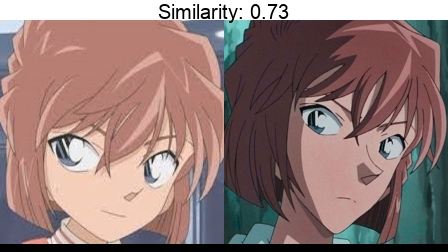

In [72]:
show_similarity(ai_child_pil, ai_adult_pil, (cosine_similarity(ai_child_feat, ai_adult_feat) + 1).cpu().detach().item() / 2)

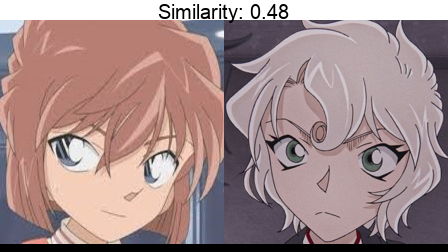

In [73]:
show_similarity(ai_child_pil, mary_sera_pil, (cosine_similarity(ai_child_feat, mary_sera_feat) + 1).cpu().detach().item() / 2)

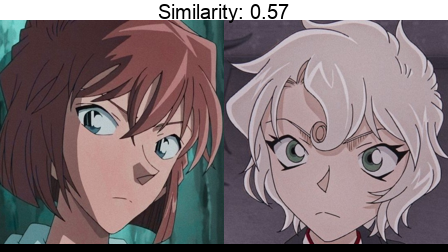

In [75]:
show_similarity(ai_adult_pil, mary_sera_pil, (cosine_similarity(ai_adult_feat, mary_sera_feat) + 1).cpu().detach().item() / 2)